![alt text](/home/yt/datascience/The-circumplex.ppm.png "circumplex")

## Valence-Arousal Prediction Audio and Visual Features

The Mediaeval 2017 Emotional Impact of Movies Task includes the data in the emotional domain 
(valence - arousal  regression) and  fear ( binary classification).
We have displayed the valence and arousal of all the movies in the dataset.
Also the time of the movie where fear is present is specified with the value of the second.
According to the Russell's circumplex model we were expectinf the "FEAR" to be appeared in the negative vallence, positive arousal part of the circumflex.
However in some movies, we can see that frightment exists in positive valence with negative arousal also.


In [1]:

import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import matplotlib.colors as colors


import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

import numpy as np
import pylab as pl
import re, fileinput
import os.path
import glob
import pickle
import sys


In [2]:
import numpy as np 
print(np.__version__) 
print(np.__path__)


1.12.1
['/home/deepuser/anaconda3/lib/python3.6/site-packages/numpy']


In [3]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
from scipy.stats import pearsonr


In [4]:
med2017visualFeaturesfolder='/home/deepuser/yasemin/MEDIAEVAL17-DevSet-Visual_features/features/'
med2017audiofolder='/home/deepuser/yasemin/MEDIAEVAL17-DevSet-Audio_features/features/'
med2017annotationsFolder = '/home/deepuser/yasemin/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/annotations/'
med2017fearFolder = '/home/deepuser/yasemin/MEDIAEVAL17-DevSet-Fear-annotations/annotations/'
med2017dataFolder='/home/deepuser/yasemin/continuous-movies/'

In [5]:
med2017visualFeaturesfolderTest='/home/deepuser/yasemin/MEDIAEVAL17-TestSet-Visual_features/visual_features/'
med2017audiofolderTest = '/home/deepuser/yasemin/MEDIAEVAL17-TestSet-Audio_features/audio_features/'
med2017datafolderTest = '/home/deepuser/yasemin/MEDIAEVAL17-TestSet-Data/data/'


In [6]:
files = glob.glob(med2017datafolderTest+'*')
testmovieNames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [7]:
files = glob.glob(med2017dataFolder+'*')
movieNames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [8]:
movieNames,testmovieNames

(['After_The_Rain',
  'Attitude_Matters',
  'Barely_legal_stories',
  'Between_Viewings',
  'Big_Buck_Bunny',
  'Chatter',
  'Cloudland',
  'Damaged_Kung_Fu',
  'Decay',
  'Elephant_s_Dream',
  'First_Bite',
  'Full_Service',
  'Islands',
  'Lesson_Learned',
  'Norm',
  'Nuclear_Family',
  'On_time',
  'Origami',
  'Parafundit',
  'Payload',
  'Riding_The_Rails',
  'Sintel',
  'Spaceman',
  'Superhero',
  'Tears_of_Steel',
  'The_room_of_franz_kafka',
  'The_secret_number',
  'To_Claire_From_Sonny',
  'Wanted',
  'You_Again'],
 ['MEDIAEVAL17_00',
  'MEDIAEVAL17_01',
  'MEDIAEVAL17_02',
  'MEDIAEVAL17_03',
  'MEDIAEVAL17_04',
  'MEDIAEVAL17_05',
  'MEDIAEVAL17_06',
  'MEDIAEVAL17_07',
  'MEDIAEVAL17_08',
  'MEDIAEVAL17_09',
  'MEDIAEVAL17_10',
  'MEDIAEVAL17_11',
  'MEDIAEVAL17_12',
  'MEDIAEVAL17_13'])

In [103]:
movgroups_wodecay = {
    0:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    1:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    2:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    3:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    4:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    5:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload']
}

movgroups = {
    0:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    1:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    2:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    3:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    4:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    5:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload'],
    6:['Decay']
}

def gettraintestmovielist(mlist,groups=movgroups):
    testlist = groups[mlist]
    trainlist =[]
    for idx, group in enumerate(groups):
        if idx != mlist:
            for g in groups[idx]:
                trainlist.append(g)
    return trainlist, testlist

## Valence - Arosal Annotations
Thank you for downloading LIRIS-ACCEDE dataset.
This file contains valence/arousal annotations for the LIRIS-ACCEDE continuous part that is used for the first subtask of the MEDIAEVAL 2017 Emotional Impact of Movies task.
For each of the 30 movies, consecutive ten seconds-segments sliding over the whole movie with a shift of 5 seconds are considered and provided with valence and arousal annotations.
Each txt file contains 4 columns separated by tabulations. The first column is the segment id, starting from 0, the second column is the starting time of the segment in the movie and the third and fourth columns are respectively the valence and arousal values for this segment.

In [104]:
def getAnnotationDf(movname,folder=med2017annotationsFolder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-valence_arousal.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

In [13]:
df = getAnnotationDf(movieNames[0])
#df.hist(alpha=0.5,bins=50)

In [14]:
#df.head()
#df.describe()

## Valence, Arousal histogram plots for Dev-Set

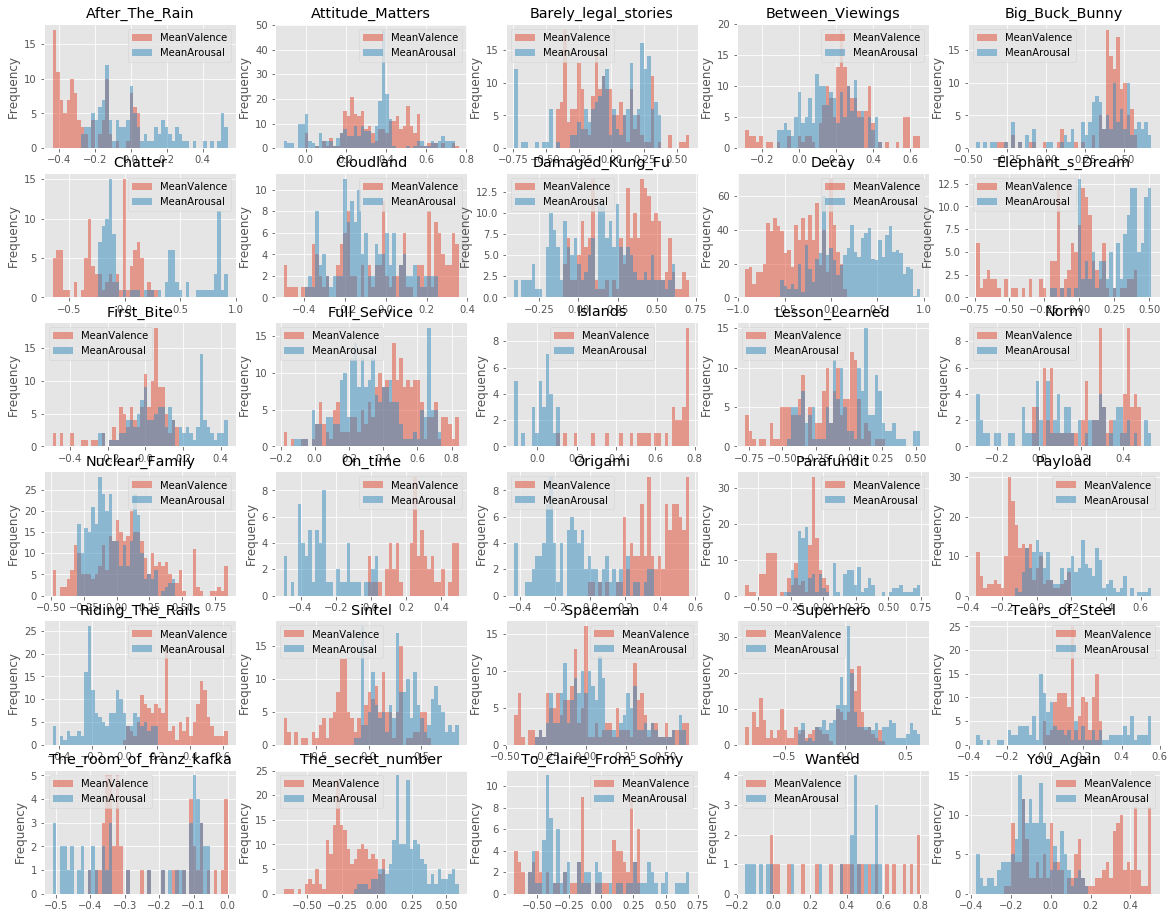

In [27]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    if (ii+1 > 30):
        plt.subplot(6,5,ii)
    else :
        plt.subplot(6,5,ii+1)
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot.hist(ax=plt.gca(),title=mov,alpha=0.5,bins=50)

## Valence , Arousal plots for Dev-Set

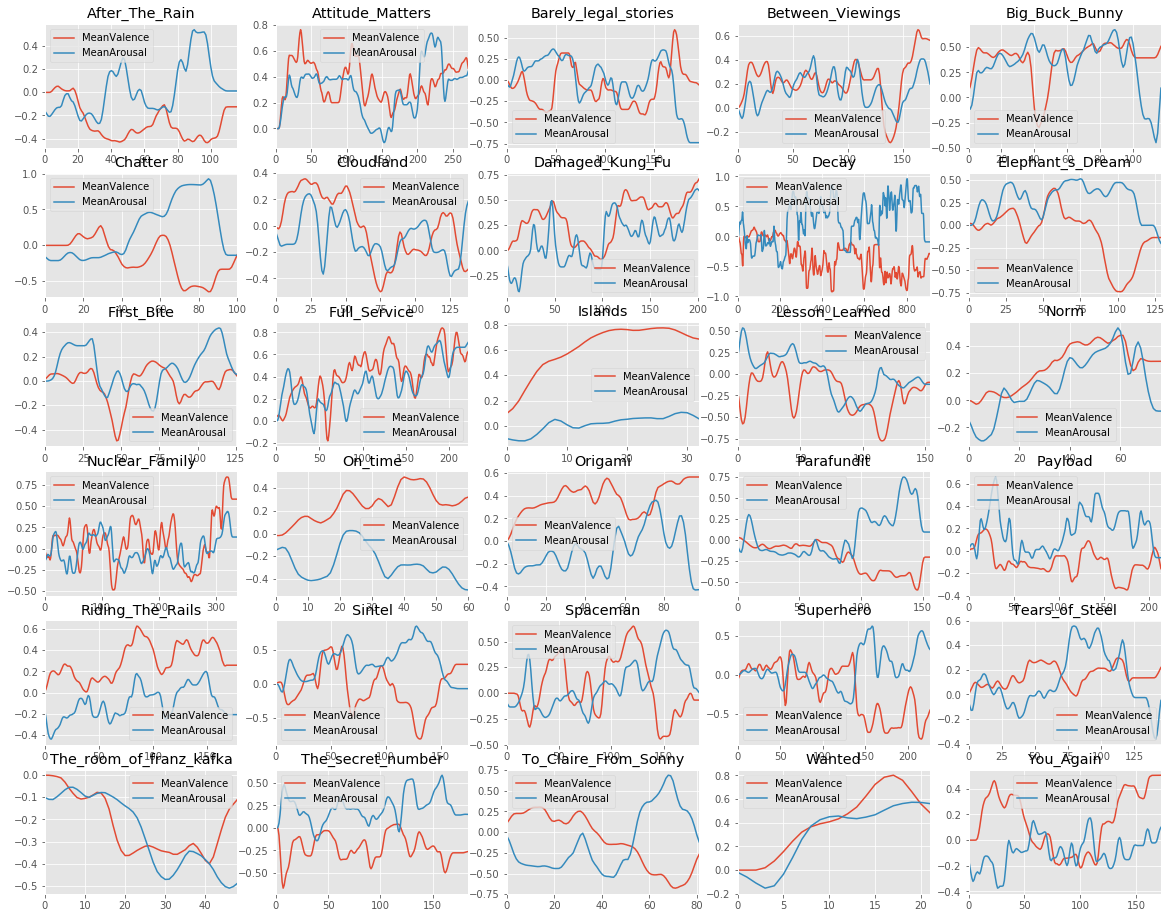

In [28]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    #.hist(alpha=0.5,bins=50)


## Fear Annotations

In [29]:
def getFearDf(movname):
    filename = os.path.join(med2017fearFolder, movname + '-MEDIAEVAL2017-fear.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df


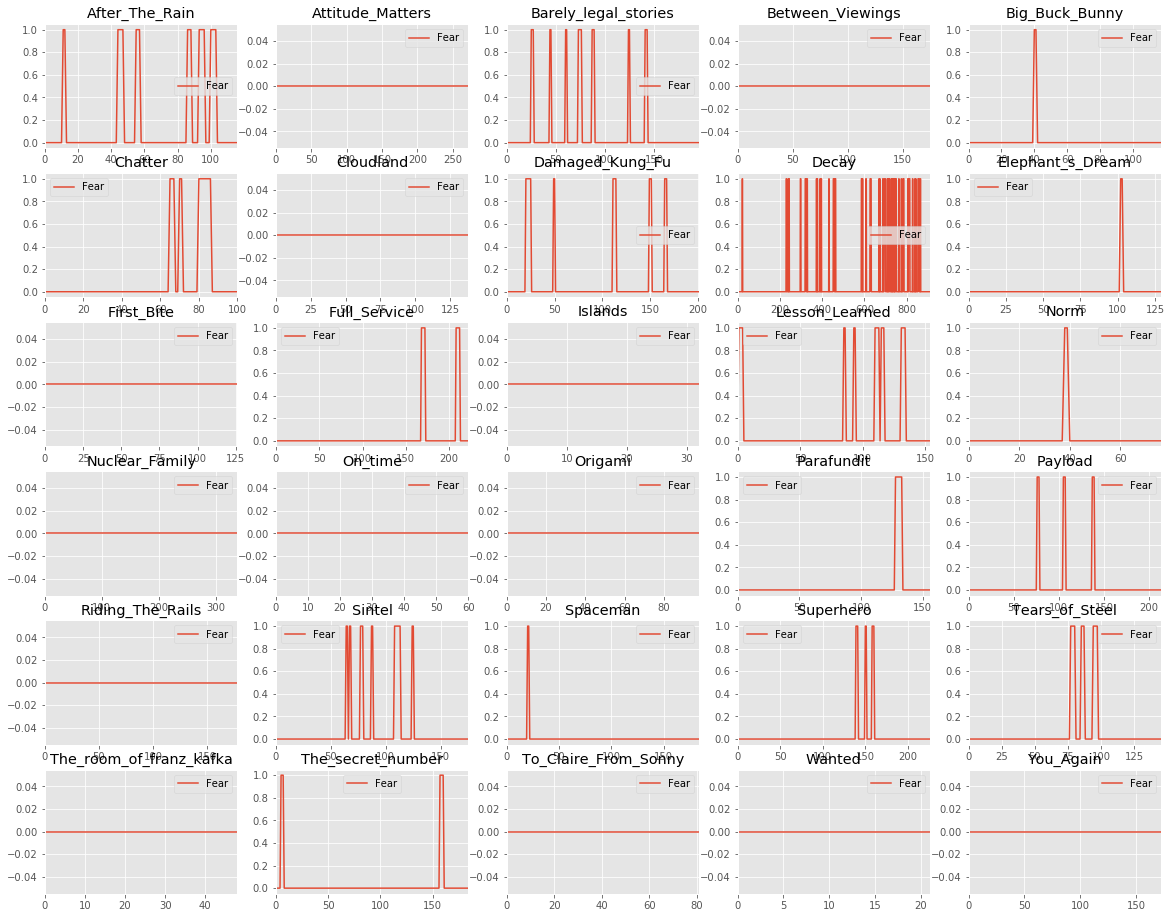

In [30]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getFearDf(mov)
    df[['Fear']].plot(ax=plt.gca(),title=mov)

## Audio Features


In [15]:
def getAudioDf(moviename,folder=med2017audiofolder):
    if 'TestSet' in folder:
        files = glob.glob(folder+moviename+'/audio_features/*.csv')
    else:
        files = glob.glob(folder+moviename+'/*.csv')
    files = sorted(files)
    files
    alist = []
    for fname in files:
        f=open(fname,'r')
        h = []
        for l in f :
            if '@attribute' in l:
                h.append(l.split()[1])
            elif l == '\n':
                l
            elif l[0] =='@':
                l
            else:
                alist.append(map(float,l.split(',')[1:])) #first attribute is string ,skipped
        f.close()
    
    return pd.DataFrame(alist,columns=h[1:])

## Visual Features

In [16]:
visual_feat = ['acc', 'cedd', 'cl', 'eh', 'fc6', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
visual_feat_wofc16 = ['acc', 'cedd', 'cl', 'eh', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [17]:
def getVisFeatureDf(moviename,typename):
    files = glob.glob(med2017visualFeaturesfolder+moviename+'/'+typename+'/*.txt')
    files = sorted(files)
    alist = []
    for fname in files:
        f=open(fname,'r')
        for l in f:
            alist.append(map(float,l.split(',')))
        f.close()
    return pd.DataFrame(alist)

def getAvgVisFeatureDf(moviename,typename):
    df = getVisFeatureDf(moviename,typename)
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    return dfwindow

def getAvgVisFeatListDf(moviename,featlist):
    df = getVisFeatureDf(moviename,featlist[0])
    for feat in featlist[1:]:
        tdf = getVisFeatureDf(moviename,feat)
        df = pd.concat([df,tdf],axis=1)
    
    dfwindow = df.rolling(10).mean()[10::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    dfwindow.columns=list(range(len(dfwindow.columns)))
    return dfwindow

In [18]:
sum([len(getAnnotationDf(m)) for m in movieNames ])

5274

In [19]:
sum([len(getAudioDf(m)) for m in movieNames ])

5264

In [20]:
sum([len(getVisFeatureDf(m,'cl')) for m in movieNames ])

26589

In [21]:
sum([len(getAvgVisFeatureDf(m,'cl')) for m in movieNames ])

5271

In [ ]:
df = getVisFeatureDf(movieNames[0],'cl')
df = getAvgVisFeatureDf(movieNames[0],'cl')
df = getAvgVisFeatListDf(movieNames[0],['cl','eh'])
#df.hist()

In [96]:
df = getAvgVisFeatListDf(movieNames[0],['fc6'])
df = getVisFeatureDf(movieNames[0],'fc6')
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,...,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,-6.034982,-1.370833,-7.608151,-10.225488,-11.605717,-5.210584,-0.570106,-0.399201,-4.358834,-1.530431,...,-6.772922,-3.920235,3.535808,-3.768895,-0.972970,-1.450922,-4.061289,-8.889291,-2.828903,-2.474411
std,5.282046,6.120563,6.696587,7.882340,8.416353,6.397838,7.603316,6.955639,6.411402,6.803205,...,8.787879,7.053448,5.910079,6.382576,5.995845,6.195906,6.565671,9.470718,5.747899,7.482110
min,-27.093000,-33.372000,-37.525000,-36.351000,-40.676000,-26.772000,-25.291000,-25.200000,-28.966000,-30.389000,...,-34.824000,-27.532000,-16.982000,-29.007000,-22.957000,-24.226000,-39.624000,-34.192000,-23.258000,-21.932000
25%,-9.277450,-4.514200,-10.872000,-16.686000,-18.211000,-9.816700,-5.612200,-3.276300,-8.852800,-5.778500,...,-13.373000,-8.350050,0.881240,-7.429650,-4.059700,-4.716550,-7.310950,-16.588000,-6.307700,-6.938300
50%,-4.939700,-0.019979,-6.017600,-9.100000,-11.602000,-4.925500,1.125800,-0.814240,-3.064100,-0.099341,...,-5.215600,-2.846400,2.869400,-2.307000,-0.345480,0.210580,-2.251800,-9.553300,-1.961800,-1.058600
75%,-2.666800,2.603200,-3.512900,-5.564500,-4.544150,0.673480,4.469550,3.152650,1.091150,2.669500,...,0.645515,-0.309410,7.675050,0.405880,2.920500,2.043250,-0.061775,0.257495,0.989700,3.095550
max,8.583500,20.884000,14.416000,11.816000,11.996000,10.658000,15.773000,20.884000,10.014000,19.303000,...,13.877000,19.664000,18.261000,11.987000,22.251000,14.256000,13.800000,10.841000,16.857000,17.493000


## Train and Test set creation

In [105]:
def getFeatureswAnnotationsDf(movieNames,featlist=visual_feat_wofc16):
    Xv = getAvgVisFeatListDf(movieNames[0],featlist)
    Xa = getAudioDf(movieNames[0])
    Xd = getAvgVisFeatListDf(movieNames[0],['fc6'])
    y = getAnnotationDf(movieNames[0])[['MeanValence','MeanArousal']]
    
    mlen = min(len(Xv),len(Xa), len(Xd),len(y))
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    Xd = Xd[:mlen]
    y = y[:mlen]
    
    for mov in movieNames[1:]:
        tXv = getAvgVisFeatListDf(mov,featlist)
        tXa = getAudioDf(mov)
        tXd = getAvgVisFeatListDf(mov,['fc6'])
        ty = getAnnotationDf(mov)[['MeanValence','MeanArousal']]
        
        mlen = min(len(tXv),len(tXa),len(tXd),len(ty))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        tXd = tXd[:mlen]
        ty = ty[:mlen]
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        Xd = Xd.append(tXd)
        y  = y.append(ty)
        
    return Xv,Xa,Xd,y

In [106]:
def getMovListAudioVisFeatListwAnnotationsDf(movieNames,featlist):
    Xv = getAvgVisFeatureDf(movieNames[0],featlist[0])
    Xa = getAudioDf(movieNames[0])
    y = getAnnotationDf(movieNames[0])[['MeanValence','MeanArousal']]
    
    mlen = min(len(Xv),len(Xa),len(y))
    print(mlen)
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    y = y[:mlen]
    
    for feattype in featlist[1:]:
        fXv = getAvgVisFeatureDf(movieNames[0],feattype)[:mlen]
        Xv = pd.concat( [Xv,fXv], axis=1 )

    for mov in movieNames[1:]:
        tXv = getAvgVisFeatureDf(mov,featlist[0])
        tXa = getAudioDf(mov)
        ty = getAnnotationDf(mov)[['MeanValence','MeanArousal']]
        
        mlen = min(len(tXv),len(tXa),len(ty))
        print(mlen)
        
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        ty = ty[:mlen]
        
        for feattype in featlist[1:]:
            fXv = getAvgVisFeatureDf(mov,feattype)[:mlen]
            tXv = pd.concat( [tXv,fXv], axis=1 )
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        y  = y.append(ty)
        
    return Xv,Xa,y

In [111]:
%%time
allXv,allXa,allXd,ally = getFeatureswAnnotationsDf(movieNames)
print(allXv.shape,allXa.shape,allXd.shape,ally.shape)

(5264, 1271) (5264, 1583) (5264, 4096) (5264, 2)
CPU times: user 2min 17s, sys: 2.45 s, total: 2min 19s
Wall time: 2min 19s


In [ ]:
#trainlist, testlist=gettraintestmovielist(2,movgroups_wodecay)  # index 1 olanları test , diğerlerini train yapan fonksiyon
#trainlist, testlist
#for ii in range(len(movgroups)):
#    trnlist, tstlist=gettraintestmovielist(ii)

In [112]:
trainlist, testlist=gettraintestmovielist(3)  # index 1 olanları test , diğerlerini train yapan fonksiyon

tXv,tXa,tXd,ty = getFeatureswAnnotationsDf(trainlist)
print(tXv.shape,tXa.shape,tXd.shape,ty.shape)
testXv, testXa, testXd, testy = getFeatureswAnnotationsDf(testlist)
print(testXv.shape, testXa.shape,testXd.shape, testy.shape)

(4538, 1271) (4538, 1583) (4538, 4096) (4538, 2)
(726, 1271) (726, 1583) (726, 4096) (726, 2)


In [121]:
def df2mat(df):
    return df.as_matrix().reshape((len(df),))
    

In [113]:
ytrainarrayVal = ty[['MeanValence']].as_matrix().reshape((len(ty),))
ytrainarrayAr = ty[['MeanArousal']].as_matrix().reshape((len(ty),))

ytestarrayVal = testy[['MeanValence']].as_matrix().reshape((len(testy),))
ytestarrayAr = testy[['MeanArousal']].as_matrix().reshape((len(testy),))


In [114]:
#tXv,tXa,ty = getMovListAudioVisFeatListwAnnotationsDf(movieNames,['cl','gabor'])
#tXv.shape,tXa.shape,ty.shape

In [117]:
X_train, X_test, y_train, y_test = train_test_split(tXv, ty,test_size=0.32, random_state=0)

Xa_train, Xa_test, ya_train, ya_test = train_test_split(tXa, ty,test_size=0.2, random_state=0)

Xd_train, Xd_test, yd_train, yd_test = train_test_split(tXd, ty,test_size=0.2, random_state=0)


In [116]:
y_train.head()

,MeanValence,MeanArousal
133,-0.147129,0.086701
114,0.555985,0.277673
154,-0.417323,0.603335
754,-0.696460,0.344620
97,0.488350,-0.024003


## Linear Regression - Valence

In [123]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
visual_regr = linear_model.LinearRegression()
audio_regr = linear_model.LinearRegression()
nn_regr = linear_model.LinearRegression()

# Train the model using the training sets
visual_regr.fit(X_train, y_train[['MeanValence']].as_matrix().reshape((len(y_train))))
audio_regr.fit(Xa_train, ya_train[['MeanValence']].as_matrix().reshape((len(ya_train))))
nn_regr.fit(Xd_train, yd_train[['MeanValence']].as_matrix().reshape((len(yd_train))))

# Make predictions using the testing set
visual_y_pred = visual_regr.predict(X_test)
audio_y_pred = audio_regr.predict(Xa_test)
nn_y_pred = nn_regr.predict(Xd_test)



In [128]:
# The coefficients
print('Visual Coefficients: \n', visual_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df2mat(y_test[['MeanValence']]), visual_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df2mat(y_test[['MeanValence']]),visual_y_pred))

print('pearson score  ',pearsonr(df2mat(y_test[['MeanValence']]),visual_y_pred))

print('Audio Coefficients: \n', audio_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df2mat(ya_test[['MeanValence']]), audio_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df2mat(ya_test[['MeanValence']]),audio_y_pred))

print('pearson score  ',pearsonr(df2mat(ya_test[['MeanValence']]),audio_y_pred))

print('FC16 Coefficients: \n', nn_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(df2mat(yd_test[['MeanValence']]), nn_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df2mat(yd_test[['MeanValence']]),nn_y_pred))

print('pearson score  ',pearsonr(df2mat(yd_test[['MeanValence']]),nn_y_pred))

Visual Coefficients: 
 [ 0.00235504  0.00578764 -0.0215921  ...,  0.047707    0.00865131
 -0.02030001]
Mean squared error: 15.92
Variance score: -127.27
pearson score   (0.15755756327105386, 1.5565000141428301e-09)
Audio Coefficients: 
 [ -3.93641210e-05  -4.68776877e-03   3.57353429e-03 ...,  -5.80230161e-03
   1.24196673e-02  -1.74694945e-02]
Mean squared error: 47.20
Variance score: -383.60
pearson score   (-0.0034107196093078667, 0.91825340348236617)
FC16 Coefficients: 
 [  6.42524224e-04   9.53657636e-04   5.41094586e-06 ...,  -6.05519763e-03
   3.59268257e-03  -1.01889487e-02]
Mean squared error: 0.18
Variance score: -0.50
pearson score   (0.49759637189204331, 5.6973891995294741e-58)


## Grid Search on Visual Features- Valence

In [41]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 

#X_train, X_test, y_train, y_test 

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 'preprocessing': [StandardScaler(),None],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100,200,1000,2000],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [1,2,3,5,10,50,100]}]

grid_vis_valence = GridSearchCV(pipe, param_grid, cv=5,n_jobs=120)
ytrainarray = y_train[['MeanValence']].as_matrix()
ytrainarray = ytrainarray.reshape((len(y_train),))
grid_vis_valence.fit(X_train,ytrainarray)

print("Best params:\n{}\n".format(grid_vis_valence.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_vis_valence.best_score_))
print("All grid scores")

grid_vis_valence.grid_scores_, grid_vis_valence.best_params_, grid_vis_valence.best_score_

/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/deepuser/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best params:
{'classifier': SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.70
All grid scores
CPU times: user 2min 14s, sys: 7.42 s, total: 2min 21s
Wall time: 2min 33s


In [42]:
tXv.shape,tXa.shape,ty.shape

((3644, 1271), (3644, 1583), (3644, 2))

In [43]:
testXv.shape, testXa.shape, testy.shape

((708, 1271), (708, 1583), (708, 2))

In [44]:
from sklearn import metrics
from scipy.stats import pearsonr

def getMetrics(y,y_pred):
    # calculate MAE using scikit-learn
    #mae = metrics.mean_absolute_error(ytestarray, y_pred)
    #print("MAE score: {:.5f}".format(mae))
    
    mse = metrics.mean_squared_error(y, y_pred)
    # calculate MSE using scikit-learn
    print("MSE score: {:.5f}".format(mse))

    # calculate RMSE using scikit-learn
    #print("RMSE: {:.5f}".format(np.sqrt(metrics.mean_squared_error(ytestarray, y_pred))))

    print("Pearson score:")
    prs = pearsonr(y,y_pred)
    print(prs)
    
    return mse,prs

In [79]:
def evaluate_pipe(pipe,trainX,trainy,testX,testy):
    
    ytrainarray = trainy.as_matrix().reshape((len(trainy),))
    ytestarray = testy.as_matrix().reshape((len(testy),))

    pipe.fit(trainX, ytrainarray)
    
    print("Train score: {:.2f}".format(pipe.score(trainX, ytrainarray)))
    print("Test score: {:.2f}".format(pipe.score(testX, ytestarray)))

    y_pred = pipe.predict(testX)

    mse, prs = getMetrics(ytestarray,y_pred)
    
    return y_pred,mse,prs

In [66]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Xa_train.shape, Xa_test.shape, ya_train.shape, ya_test.shape)
print(tXv.shape,tXa.shape,ty.shape)
print(testXv.shape, testXa.shape, testy.shape)

(2477, 1271) (1167, 1271) (2477, 2) (1167, 2)
(2915, 1583) (729, 1583) (2915, 2) (729, 2)
(3644, 1271) (3644, 1583) (3644, 2)
(708, 1271) (708, 1583) (708, 2)


In [145]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#X_train.shape, X_test.shape, y_train.shape, y_test.shape 
#tXv.shape,tXa.shape,ty.shape
#testXv.shape, testXa.shape, testy.shape

pipe_visual_valence = make_pipeline(
    StandardScaler(), 
    SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

#X_train, X_test, y_train, y_test 
y_pred_visV_train,mse,prs = evaluate_pipe(pipe_visual_valence, 
                                   X_train,y_train[['MeanValence']], 
                                   X_test,  y_test[['MeanValence']])
#y_pred_vis,mse,prs = evaluate_pipe(pipe_visual_valence,tXv,ytrain,testXv,ytest)

y_pred_visV_test,mse,prs = evaluate_pipe(pipe_visual_valence, 
                                   tXv,ty[['MeanValence']], 
                                   testXv, testy[['MeanValence']])



Train score: 0.95
Test score: 0.81
MSE score: 0.02354
Pearson score:
(0.90350226565792946, 0.0)
Train score: 0.95
Test score: -0.43
MSE score: 0.14633
Pearson score:
(0.030084844730423714, 0.41828273157442286)
CPU times: user 1min 2s, sys: 4 ms, total: 1min 2s
Wall time: 1min 2s


## Grid-Search on Audio features - Valence

In [53]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor()],
     'preprocessing': [None],
     'classifier__n_estimators': [100,400, 600, 1000],
     'classifier__max_features': [3,5,10,15,20]}
]

grid_audio_valence = GridSearchCV(pipe, param_grid, cv=5,n_jobs=100)
ytrainarray = ya_train[['MeanValence']].as_matrix()
ytrainarray = ytrainarray.reshape((len(ya_train),))
grid_audio_valence.fit(Xa_train,ytrainarray)

print("Best params:\n{}\n".format(grid_audio_valence.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_audio_valence.best_score_))
print("All grid scores")

grid_audio_valence.grid_scores_, grid_audio_valence.best_params_, grid_audio_valence.best_score_

Best params:
{'classifier': SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.45
All grid scores
CPU times: user 1min 40s, sys: 7.46 s, total: 1min 47s
Wall time: 2min 41s


In [63]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Xa_train.shape, Xa_test.shape, ya_train.shape, ya_test.shape)
print(tXv.shape,tXa.shape,ty.shape)
print(testXv.shape, testXa.shape, testy.shape)

(2477, 1271) (1167, 1271) (2477, 2) (1167, 2)
(2915, 1583) (729, 1583) (2915, 2) (729, 2)
(3644, 1271) (3644, 1583) (3644, 2)
(708, 1271) (708, 1583) (708, 2)


In [146]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_audio_valence = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)

#    SVR(C=100, cache_size=200, coef0=0.0, degree=3, 
#       epsilon=0.1, gamma=0.001,
#      kernel='rbf', max_iter=-1, 
#     shrinking=True, tol=0.001, verbose=False)


#Xa_train, Xa_test, ya_train, ya_test 
y_pred_audV_train,mse,prs = evaluate_pipe(pipe_audio_valence, 
                                   Xa_train,ya_train[['MeanValence']], 
                                   Xa_test,ya_test[['MeanValence']])

y_pred_audV_test,mse,prs = evaluate_pipe(pipe_audio_valence, 
                                   tXa,ty[['MeanValence']], 
                                   testXa,testy[['MeanValence']])



Train score: 0.93
Test score: 0.54
MSE score: 0.05610
Pearson score:
(0.74958922543183482, 1.5414383179586127e-164)
Train score: 0.94
Test score: -0.19
MSE score: 0.12141
Pearson score:
(0.045289318158661697, 0.22291417673721703)
CPU times: user 2min 9s, sys: 4 ms, total: 2min 9s
Wall time: 2min 9s


In [149]:
y_pred_visV_train.shape,y_test.shape, y_pred_visV_test.shape,testy.shape

((1453,), (1453, 2), (726,), (726, 2))

In [151]:
y_pred_audV_train.shape,ya_test.shape, y_pred_audV_test.shape,testy.shape

((908,), (908, 2), (726,), (726, 2))

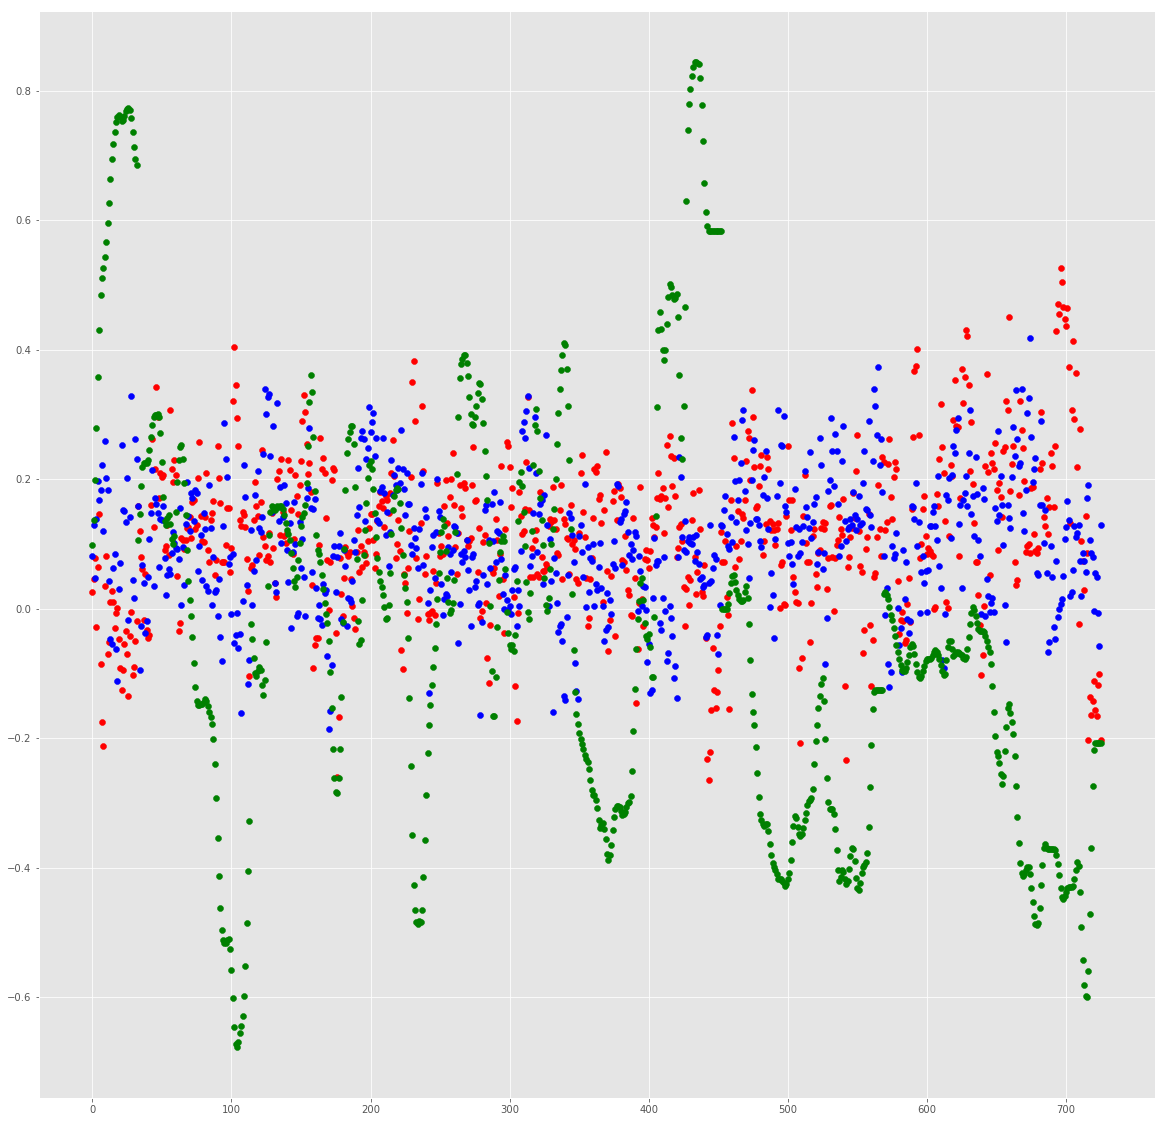

In [142]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_vis,c='r')
plt.scatter(range(len(testy)),y_pred_aud,c='b')
plt.scatter(range(len(testy)),df2mat(testy[['MeanValence']]),c='g')


## Grid Search on Visual Features -Arousal

In [90]:
%%time
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor()],
     'preprocessing': [None],
     'classifier__n_estimators': [100,400, 600, 1000],
     'classifier__max_features': [3,5,10,15,20]}
]

grid_vis_arousal = GridSearchCV(pipe, param_grid, cv=5,n_jobs=120)
ytrainarray = y_train[['MeanArousal']].as_matrix()
ytrainarray = ytrainarray.reshape((len(y_train),))
grid_vis_arousal.fit(X_train,ytrainarray)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
grid_vis_arousal.grid_scores_, grid_vis_arousal.best_params_, grid_vis_arousal.best_score_

Best params:
{'classifier': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.53
CPU times: user 1min 40s, sys: 15.1 s, total: 1min 55s
Wall time: 2min 15s


In [91]:
grid_vis_arousal.best_params_

{'classifier': SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'classifier__C': 10,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [92]:
grid_vis_arousal.best_score_

0.7221442609261519

In [143]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#X_train.shape, X_test.shape, y_train.shape, y_test.shape 
#tXv.shape,tXa.shape,ty.shape
#testXv.shape, testXa.shape, testy.shape

pipe_visual_arousal = make_pipeline(
    StandardScaler(), 
    SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
        gamma=0.001, kernel='rbf', max_iter=-1, shrinking=True, 
        tol=0.001, verbose=False))

#X_train, X_test, y_train, y_test 
y_pred_visA_train,mse,prs = evaluate_pipe(pipe_visual_arousal, 
                                   X_train,y_train[['MeanArousal']], 
                                   X_test,  y_test[['MeanArousal']])

y_pred_visA_test,mse,prs = evaluate_pipe(pipe_visual_arousal, 
                                   tXv,ty[['MeanArousal']], 
                                   testXv, testy[['MeanArousal']])


Train score: 0.92
Test score: 0.74
MSE score: 0.02160
Pearson score:
(0.87066336610913619, 0.0)
Train score: 0.93
Test score: -0.53
MSE score: 0.08375
Pearson score:
(-0.00044741673095561598, 0.99039801241948466)
CPU times: user 1min 3s, sys: 16 ms, total: 1min 3s
Wall time: 1min 3s


In [148]:
y_pred_visA_train.shape,y_test.shape, y_pred_visA_test.shape,testy.shape

((1453,), (1453, 2), (726,), (726, 2))

## Grid Search on Audio Features -Arousal

In [ ]:
%%time
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVR())])

param_grid = [
    {'classifier': [SVR()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestRegressor()],
     'preprocessing': [None],
     'classifier__n_estimators': [100,400, 600, 1000],
     'classifier__max_features': [3,5,10,15,20]}
]

grid_audio_arousal = GridSearchCV(pipe, param_grid, cv=5,n_jobs=220)
ytrainarray = ya_train[['MeanArousal']].as_matrix()
ytrainarray = ytrainarray.reshape((len(ya_train),))
grid_audio_arousal.fit(Xa_train,ytrainarray)



In [85]:
print("Best params:\n{}\n".format(grid_audio_arousal.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_audio_arousal.best_score_))
grid_audio_arousal.grid_scores_, grid_audio_arousal.best_params_, grid_audio_arousal.best_score_

Best params:
{'classifier': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 100, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best cross-validation score: 0.40


([mean: 0.01534, std: 0.00601, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.00463, std: 0.00551, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.00463, std: 0.00551, params: {'classifier': SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.1, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)},
  mean: -0.004

In [86]:
grid_audio_arousal.best_score_

0.3964487621533377

In [144]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_audio_arousal = make_pipeline(
    StandardScaler(copy=True, with_mean=True, with_std=True),
    SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
)
y_pred_audA_train,mse,prs = evaluate_pipe(pipe_audio_arousal, 
                                   Xa_train,ya_train[['MeanArousal']], 
                                   Xa_test,ya_test[['MeanArousal']])

y_pred_audA_test,mse,prs = evaluate_pipe(pipe_audio_arousal, 
                                   tXa,ty[['MeanArousal']], 
                                   testXa,testy[['MeanArousal']])



Train score: 0.91
Test score: 0.40
MSE score: 0.04757
Pearson score:
(0.64484144216645767, 7.2213486116344197e-108)
Train score: 0.91
Test score: -0.35
MSE score: 0.07361
Pearson score:
(0.067498032618361112, 0.069120312453141805)
CPU times: user 2min 8s, sys: 12 ms, total: 2min 8s
Wall time: 2min 8s


In [158]:
y_pred_visA_train.shape,y_test.shape, y_pred_visA_test.shape,testy.shape

((1453,), (1453, 2), (726,), (726, 2))

In [153]:
y_pred_audA_train.shape,ya_test.shape, y_pred_audA_test.shape,testy.shape

((908,), (908, 2), (726,), (726, 2))

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_visA_test,c='r')
plt.scatter(range(len(testy)),y_pred_audA_test,c='b')
plt.scatter(range(len(testy)),df2mat(testy[['MeanArousal']]),c='g')


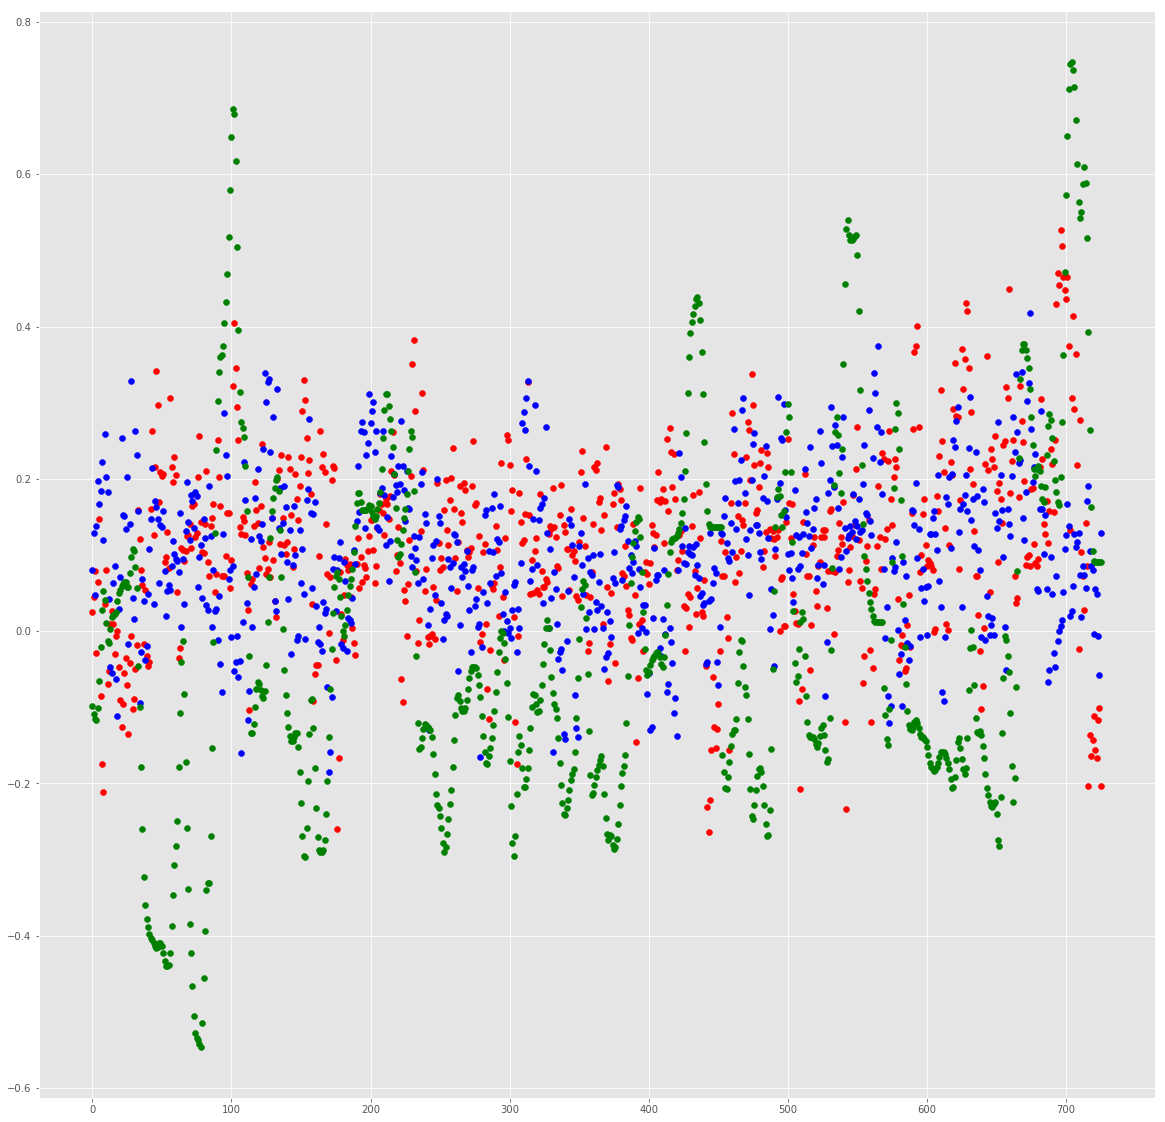

In [156]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(testy)),y_pred_visA_test,c='r')
plt.scatter(range(len(testy)),y_pred_audA_test,c='b')
plt.scatter(range(len(testy)),df2mat(testy[['MeanArousal']]),c='g')


# Test Run 1